In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## TASK 3 - Когортный анализ в Python

In [61]:
purchases = pd.read_csv(r'F:\Макс 2023\Аналитика данных\Как стать аналитиком данных [часть 4 из 6] (2021)\[Moresliv.com] 08_Спринт_Анализ бизнес-показателей\[Moresliv.com] 03_Когортный анализ\[Moresliv.com] game_purchases.csv')

In [62]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16666 entries, 0 to 16665
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   purchase_datetime  16666 non-null  object 
 1   player_id          16666 non-null  object 
 2   item               16666 non-null  object 
 3   price              16666 non-null  float64
 4   purchase_id        16666 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 651.1+ KB


In [43]:
purchases['purchase_datetime'] = pd.to_datetime(purchases['purchase_datetime'])

In [7]:
purchases.head()

,purchase_datetime,player_id,item,price,purchase_id
0,2019-01-01 00:15:54,2434d4ef-7949-4311-a9e6-9263e2ea2b7c,armour,0.1,10423
1,2019-01-01 00:16:56,1ecd854d-f707-44a2-b174-0c0039668650,life,0.3,10424
2,2019-01-01 00:56:17,1156b1a0-732b-4732-ab41-79f77cd0e719,life,0.3,10425
3,2019-01-01 00:58:17,1f7b30f3-26ac-45bd-82b4-30fad1d1398d,armour,0.1,10426
4,2019-01-01 01:15:42,4697efd3-15b2-4f40-84fb-7e5c65e390c9,armour,0.1,10427


In [64]:
first_purchase_dates = purchases.groupby('player_id')['purchase_datetime'].min()

first_purchase_dates.name = 'first_purchase_datetime'

purchases = purchases.join(first_purchase_dates, on='player_id')

In [65]:
first_purchase_dates

player_id
00065bd9-5355-4c4b-b331-e8dcb74c18dc    2019-03-16 12:34:54
00209bef-ccb4-44d1-b385-7a7a006b81a9    2019-01-06 01:51:41
0024571d-3a4a-4664-858c-ac4317205892    2019-05-23 03:13:15
00369580-9fbf-4f2f-b3bf-60b18aacdb32    2019-03-04 19:05:45
003a9684-be82-4b7e-a176-4cc8a6beb6fe    2019-01-14 21:48:20
                                               ...         
ffb3c830-276e-4210-8df9-7634e1025e74    2019-02-04 17:09:23
ffb61b2c-b817-4c5f-ae2a-6b71d7986002    2019-07-22 09:31:39
ffc3ff41-e006-49ae-9d93-57e7762d3c01    2019-01-13 12:43:09
ffe9d380-9f51-407a-8f5e-dd21b38f77bc    2019-01-03 04:32:49
fff4b145-c40b-4264-8c8e-0ac676779cba    2019-01-20 04:06:46
Name: first_purchase_datetime, Length: 4000, dtype: object

In [66]:
purchases.head()

,purchase_datetime,player_id,item,price,purchase_id,first_purchase_datetime
0,2019-01-01 00:15:54,2434d4ef-7949-4311-a9e6-9263e2ea2b7c,armour,0.1,10423,2019-01-01 00:15:54
1,2019-01-01 00:16:56,1ecd854d-f707-44a2-b174-0c0039668650,life,0.3,10424,2019-01-01 00:16:56
2,2019-01-01 00:56:17,1156b1a0-732b-4732-ab41-79f77cd0e719,life,0.3,10425,2019-01-01 00:56:17
3,2019-01-01 00:58:17,1f7b30f3-26ac-45bd-82b4-30fad1d1398d,armour,0.1,10426,2019-01-01 00:58:17
4,2019-01-01 01:15:42,4697efd3-15b2-4f40-84fb-7e5c65e390c9,armour,0.1,10427,2019-01-01 01:15:42


In [70]:
purchases['purchase_month'] = purchases['purchase_datetime'].astype('datetime64[M]')
purchases['first_purchase_month'] = purchases['first_purchase_datetime'].astype('datetime64[M]')

In [71]:
purchases.head()

,purchase_datetime,player_id,item,price,purchase_id,first_purchase_datetime,purchase_month,first_purchase_month
0,2019-01-01 00:15:54,2434d4ef-7949-4311-a9e6-9263e2ea2b7c,armour,0.1,10423,2019-01-01 00:15:54,2019-01-01,2019-01-01
1,2019-01-01 00:16:56,1ecd854d-f707-44a2-b174-0c0039668650,life,0.3,10424,2019-01-01 00:16:56,2019-01-01,2019-01-01
2,2019-01-01 00:56:17,1156b1a0-732b-4732-ab41-79f77cd0e719,life,0.3,10425,2019-01-01 00:56:17,2019-01-01,2019-01-01
3,2019-01-01 00:58:17,1f7b30f3-26ac-45bd-82b4-30fad1d1398d,armour,0.1,10426,2019-01-01 00:58:17,2019-01-01,2019-01-01
4,2019-01-01 01:15:42,4697efd3-15b2-4f40-84fb-7e5c65e390c9,armour,0.1,10427,2019-01-01 01:15:42,2019-01-01,2019-01-01


In [72]:
cohort_stats = purchases.groupby('first_purchase_month').agg({'price': 'sum'})
cohort_stats

,price
first_purchase_month,
2019-01-01,2432.2
2019-02-01,602.5
2019-03-01,292.7
2019-04-01,192.8
2019-05-01,108.5
2019-06-01,72.8
2019-07-01,46.7


# TASK 5 - Оценка изменений относительных показателей по времени жизни

In [2]:
purchases = pd.read_csv(r'F:\Макс 2023\Аналитика данных\Как стать аналитиком данных [часть 4 из 6] (2021)\[Moresliv.com] 08_Спринт_Анализ бизнес-показателей\[Moresliv.com] 03_Когортный анализ\[Moresliv.com] game_purchases.csv')

In [3]:
first_purchase_dates = purchases.groupby('player_id')['purchase_datetime'].min()

first_purchase_dates.name = 'first_purchase_datetime'

purchases = purchases.join(first_purchase_dates, on='player_id')

purchases['purchase_month'] = purchases['purchase_datetime'].astype('datetime64[M]')

purchases['first_purchase_month'] = purchases['first_purchase_datetime'].astype('datetime64[M]')

In [4]:
purchases.head()

,purchase_datetime,player_id,item,price,purchase_id,first_purchase_datetime,purchase_month,first_purchase_month
0,2019-01-01 00:15:54,2434d4ef-7949-4311-a9e6-9263e2ea2b7c,armour,0.1,10423,2019-01-01 00:15:54,2019-01-01,2019-01-01
1,2019-01-01 00:16:56,1ecd854d-f707-44a2-b174-0c0039668650,life,0.3,10424,2019-01-01 00:16:56,2019-01-01,2019-01-01
2,2019-01-01 00:56:17,1156b1a0-732b-4732-ab41-79f77cd0e719,life,0.3,10425,2019-01-01 00:56:17,2019-01-01,2019-01-01
3,2019-01-01 00:58:17,1f7b30f3-26ac-45bd-82b4-30fad1d1398d,armour,0.1,10426,2019-01-01 00:58:17,2019-01-01,2019-01-01
4,2019-01-01 01:15:42,4697efd3-15b2-4f40-84fb-7e5c65e390c9,armour,0.1,10427,2019-01-01 01:15:42,2019-01-01,2019-01-01


In [5]:
purchase_pivot = purchases.pivot_table(index='first_purchase_month', 
                                       columns='purchase_month',
                                       values='price', 
                                       aggfunc='sum')
purchase_pivot

purchase_month,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01
first_purchase_month,,,,,,,
2019-01-01,555.6,303.7,318.2,323.3,314.3,313.1,304.0
2019-02-01,NaN,218.9,77.1,75.8,81.2,69.3,80.2
2019-03-01,NaN,NaN,145.1,35.7,38.8,38.1,35.0
2019-04-01,NaN,NaN,NaN,111.5,28.9,23.6,28.8
2019-05-01,NaN,NaN,NaN,NaN,81.8,12.9,13.8
2019-06-01,NaN,NaN,NaN,NaN,NaN,61.5,11.3
2019-07-01,NaN,NaN,NaN,NaN,NaN,NaN,46.7


## TASK 5_2

In [6]:
purchases_grouped_by_cohorts = purchases.groupby(['first_purchase_month', 'purchase_month']).agg({'purchase_id': 'nunique', 'player_id': 'nunique'})
purchases_grouped_by_cohorts['purchases_per_player'] = purchases_grouped_by_cohorts['purchase_id'] / purchases_grouped_by_cohorts['player_id']
purchases_grouped_by_cohorts

purchase_id  player_id  \
first_purchase_month purchase_month                           
2019-01-01           2019-01-01             2507       1500   
                     2019-02-01             1340        655   
                     2019-03-01             1418        686   
                     2019-04-01             1444        663   
                     2019-05-01             1415        662   
                     2019-06-01             1392        696   
                     2019-07-01             1345        664   
2019-02-01           2019-02-01              959        763   
                     2019-03-01              335        230   
                     2019-04-01              325        239   
                     2019-05-01              354        260   
                     2019-06-01              308        226   
                     2019-07-01              349        252   
2019-03-01           2019-03-01              636        541   
                     2019-04-01              157        126   
                     2019-05-01              170        131   
                     2019-06-01              173        130   
                     2019-07-01              152        118   
2019-04-01           2019-04-01              500        435   
                     2019-05-01              135        103   
                     2019-06-01              111         91   
                     2019-07-01              136        103   
2019-05-01           2019-05-01              356        328   
                     2019-06-01               63         55   
                     2019-07-01               63         54   
2019-06-01           2019-06-01              269        241   
                     2019-07-01               48         41   
2019-07-01           2019-07-01              206        192   

                                     purchases_per_player  
first_purchase_month purchase_month                        
2019-01-01           2019-01-01                  1.671333  
                     2019-02-01                  2.045802  
                     2019-03-01                  2.067055  
                     2019-04-01                  2.177979  
                     2019-05-01                  2.137462  
                     2019-06-01                  2.000000  
                     2019-07-01                  2.025602  
2019-02-01           2019-02-01                  1.256881  
                     2019-03-01                  1.456522  
                     2019-04-01                  1.359833  
                     2019-05-01                  1.361538  
                     2019-06-01                  1.362832  
                     2019-07-01                  1.384921  
2019-03-01           2019-03-01                  1.175601  
                     2019-04-01                  1.246032  
                     2019-05-01                  1.297710  
                     2019-06-01                  1.330769  
                     2019-07-01                  1.288136  
2019-04-01           2019-04-01                  1.149425  
                     2019-05-01                  1.310680  
                     2019-06-01                  1.219780  
                     2019-07-01                  1.320388  
2019-05-01           2019-05-01                  1.085366  
                     2019-06-01                  1.145455  
                     2019-07-01                  1.166667  
2019-06-01           2019-06-01                  1.116183  
                     2019-07-01                  1.170732  
2019-07-01           2019-07-01                  1.072917

In [7]:
mean_purchases_pivot = purchases_grouped_by_cohorts.pivot_table(index='first_purchase_month', 
                                                                columns='purchase_month',
                                                                values='purchases_per_player',
                                                                aggfunc='mean')
mean_purchases_pivot

purchase_month,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01
first_purchase_month,,,,,,,
2019-01-01,1.671333,2.045802,2.067055,2.177979,2.137462,2.000000,2.025602
2019-02-01,NaN,1.256881,1.456522,1.359833,1.361538,1.362832,1.384921
2019-03-01,NaN,NaN,1.175601,1.246032,1.297710,1.330769,1.288136
2019-04-01,NaN,NaN,NaN,1.149425,1.310680,1.219780,1.320388
2019-05-01,NaN,NaN,NaN,NaN,1.085366,1.145455,1.166667
2019-06-01,NaN,NaN,NaN,NaN,NaN,1.116183,1.170732
2019-07-01,NaN,NaN,NaN,NaN,NaN,NaN,1.072917


## TASK 5_3

In [8]:
purchases_grouped_by_cohorts = purchases_grouped_by_cohorts.reset_index()
purchases_grouped_by_cohorts.head()

,first_purchase_month,purchase_month,purchase_id,player_id,purchases_per_player
0,2019-01-01,2019-01-01,2507,1500,1.671333
1,2019-01-01,2019-02-01,1340,655,2.045802
2,2019-01-01,2019-03-01,1418,686,2.067055
3,2019-01-01,2019-04-01,1444,663,2.177979
4,2019-01-01,2019-05-01,1415,662,2.137462


In [9]:
purchases_grouped_by_cohorts['cohort_lifetime'] = purchases_grouped_by_cohorts['purchase_month'] - purchases_grouped_by_cohorts['first_purchase_month']
purchases_grouped_by_cohorts['cohort_lifetime'].head()

0     0 days
1    31 days
2    59 days
3    90 days
4   120 days
Name: cohort_lifetime, dtype: timedelta64[ns]

In [10]:
purchases_grouped_by_cohorts['cohort_lifetime'] = purchases_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1, 'M')
purchases_grouped_by_cohorts['cohort_lifetime'].head()

0    0.000000
1    1.018501
2    1.938438
3    2.956940
4    3.942586
Name: cohort_lifetime, dtype: float64

In [11]:
purchases_grouped_by_cohorts['cohort_lifetime'] = purchases_grouped_by_cohorts['cohort_lifetime'].round().astype('int')
purchases_grouped_by_cohorts.head()

,first_purchase_month,purchase_month,purchase_id,player_id,purchases_per_player,cohort_lifetime
0,2019-01-01,2019-01-01,2507,1500,1.671333,0
1,2019-01-01,2019-02-01,1340,655,2.045802,1
2,2019-01-01,2019-03-01,1418,686,2.067055,2
3,2019-01-01,2019-04-01,1444,663,2.177979,3
4,2019-01-01,2019-05-01,1415,662,2.137462,4


## TASK 5_4

In [12]:
purchases_grouped_by_cohorts['first_purchase_month'] = purchases_grouped_by_cohorts['first_purchase_month'].dt.strftime('%Y-%m')

In [13]:
lifetime_pivot = purchases_grouped_by_cohorts.pivot_table(index='first_purchase_month', 
                                                          columns='cohort_lifetime', 
                                                          values='purchases_per_player',
                                                          aggfunc='mean')
lifetime_pivot

cohort_lifetime,0,1,2,3,4,5,6
first_purchase_month,,,,,,,
2019-01,1.671333,2.045802,2.067055,2.177979,2.137462,2.000000,2.025602
2019-02,1.256881,1.456522,1.359833,1.361538,1.362832,1.384921,NaN
2019-03,1.175601,1.246032,1.297710,1.330769,1.288136,NaN,NaN
2019-04,1.149425,1.310680,1.219780,1.320388,NaN,NaN,NaN
2019-05,1.085366,1.145455,1.166667,NaN,NaN,NaN,NaN
2019-06,1.116183,1.170732,NaN,NaN,NaN,NaN,NaN
2019-07,1.072917,NaN,NaN,NaN,NaN,NaN,NaN


# TASK 6 - Визуализация когортного анализа

In [14]:
import seaborn as sns

Text(0.5, 1.0, 'Количество покупок на 1-го пользователя')

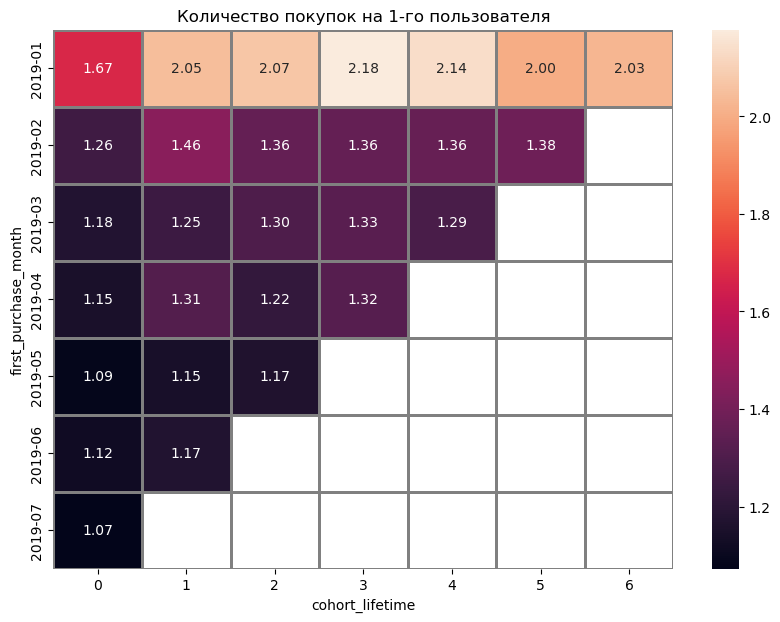

In [18]:
plt.figure(figsize=(10, 7))
sns.heatmap(lifetime_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.title('Количество покупок на 1-го пользователя')

In [27]:
revenue_per_user_pivot = pd.read_csv(r'F:\Макс 2023\Аналитика данных\Как стать аналитиком данных [часть 4 из 6] (2021)\[Moresliv.com] 08_Спринт_Анализ бизнес-показателей\[Moresliv.com] 03_Когортный анализ\[Moresliv.com] revenue_pivot.csv', index_col='first_order_month')

In [28]:
revenue_per_user_pivot

,0,1,2,3,4,5,6,7,8,9,10,11,12
first_order_month,,,,,,,,,,,,,
2010-12,585.820277,800.065703,740.867350,679.167630,718.706833,921.579457,767.573609,1009.721349,1053.779741,1469.620909,1333.879565,1060.679593,899.138605
2011-01,498.453926,905.417347,982.043393,413.779038,629.673281,753.184355,553.965000,638.558776,1042.684630,1343.905536,847.944773,403.640000,NaN
2011-02,401.278221,437.323556,433.499130,423.481207,349.027037,362.859268,424.234474,562.272885,461.418372,574.517609,352.845909,NaN,NaN
2011-03,395.472962,502.032143,449.691940,715.016400,719.974146,424.775263,564.154355,642.902692,495.140154,376.427222,NaN,NaN,NaN
2011-04,395.875000,354.822857,445.327838,604.990937,508.757073,429.296667,754.088824,489.552037,229.344615,NaN,NaN,NaN,NaN
2011-05,451.674235,377.906667,373.290270,426.063784,636.184048,530.985429,494.602549,456.441250,NaN,NaN,NaN,NaN,NaN
2011-06,346.007070,584.535172,470.198000,402.130526,527.745000,493.414314,258.680769,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,393.729948,310.679500,354.415417,453.286154,290.736429,368.583333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,434.611361,423.647273,379.184375,394.975926,326.678182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Средний чек покупателей')

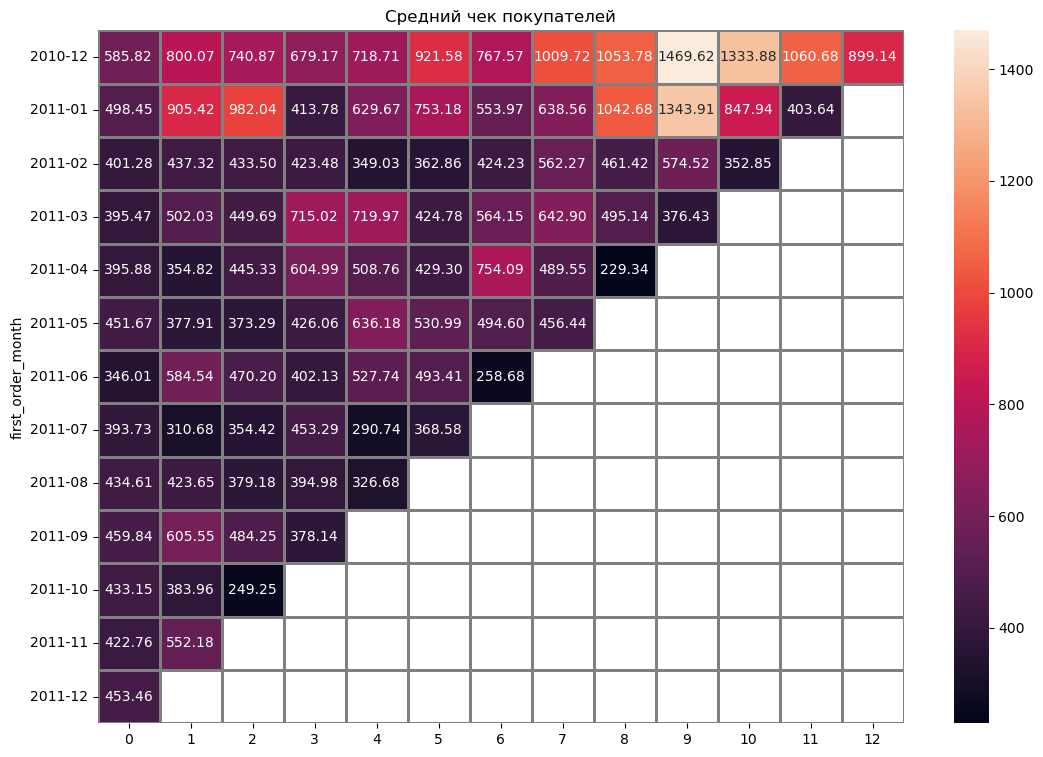

In [30]:
plt.figure(figsize=(13, 9))
sns.heatmap(revenue_per_user_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.title('Средний чек покупателей')

# TASK 8 - Расчёт Retention Rate в Python

In [31]:
user_activity = pd.read_csv(r'F:\Макс 2023\Аналитика данных\Как стать аналитиком данных [часть 4 из 6] (2021)\[Moresliv.com] 08_Спринт_Анализ бизнес-показателей\[Moresliv.com] 03_Когортный анализ\[Moresliv.com] work_user_activity.csv')

In [36]:
user_activity.head()

,activity_date,user_id
0,2019-06-23,6166c25b-210e-454d-904f-5401598c20dd
1,2019-07-14,b24a1beb-d88e-4900-b3e6-4aebde2c8511
2,2019-06-23,519016b0-31de-493f-8ec5-24da36b87372
3,2019-06-20,324e488b-cf25-4a7f-9c7a-70f6cf6561a5
4,2019-06-09,4f539c3c-f65f-4716-ae1b-5f060669fb74


In [35]:
user_activity['activity_date'] = pd.to_datetime(user_activity['activity_date'])

In [42]:
first_activity_date = user_activity.groupby('user_id')['activity_date'].min()
first_activity_date.name = 'first_activity_date'
first_activity_date

user_id
000032c7-0fc4-4382-bdc9-52891fe79077   2019-06-17
0000ca0e-154f-41e7-a391-0e5a2fef11b4   2019-06-10
00018971-c30b-4898-8d0d-8e6f43108ec8   2019-06-17
0002da1c-c10f-429c-8158-d38799fed951   2019-06-28
0002dd51-6b1b-49ac-bfbc-fac7874f602b   2019-06-25
                                          ...    
fffadcb5-98d4-47e7-8786-44370e7495ee   2019-06-22
fffbe631-1038-4c78-857d-92a332245714   2019-06-04
fffd841c-7e05-497f-b4c6-a3947809fcfd   2019-06-12
fffd8750-9fe7-462a-9716-5c3b5b097fcc   2019-07-08
fffdf5d1-8bfc-4928-bb23-d693edbf01ad   2019-06-10
Name: first_activity_date, Length: 87737, dtype: datetime64[ns]

In [43]:
user_activity = user_activity.join(first_activity_date, on='user_id')

In [44]:
user_activity.head()

,activity_date,user_id,first_activity_date
0,2019-06-23,6166c25b-210e-454d-904f-5401598c20dd,2019-06-10
1,2019-07-14,b24a1beb-d88e-4900-b3e6-4aebde2c8511,2019-07-14
2,2019-06-23,519016b0-31de-493f-8ec5-24da36b87372,2019-06-14
3,2019-06-20,324e488b-cf25-4a7f-9c7a-70f6cf6561a5,2019-06-20
4,2019-06-09,4f539c3c-f65f-4716-ae1b-5f060669fb74,2019-06-09


In [63]:
user_activity['activity_week'] = pd.to_datetime(user_activity['activity_date'], 
                                                unit='d') - pd.to_timedelta(user_activity['activity_date'].dt.dayofweek, 
                                                                           unit='d')

user_activity['first_activity_week'] = pd.to_datetime(user_activity['first_activity_date'], 
                                                unit='d') - pd.to_timedelta(user_activity['first_activity_date'].dt.dayofweek, 
                                                                           unit='d')

In [64]:
user_activity.head()

,activity_date,user_id,first_activity_date,activity_week,first_activity_week
0,2019-06-23,6166c25b-210e-454d-904f-5401598c20dd,2019-06-10,2019-06-17,2019-06-10
1,2019-07-14,b24a1beb-d88e-4900-b3e6-4aebde2c8511,2019-07-14,2019-07-08,2019-07-08
2,2019-06-23,519016b0-31de-493f-8ec5-24da36b87372,2019-06-14,2019-06-17,2019-06-10
3,2019-06-20,324e488b-cf25-4a7f-9c7a-70f6cf6561a5,2019-06-20,2019-06-17,2019-06-17
4,2019-06-09,4f539c3c-f65f-4716-ae1b-5f060669fb74,2019-06-09,2019-06-03,2019-06-03


## TASK 8_2

In [68]:
user_activity['cohort_lifetime'] = user_activity['activity_week'] - user_activity['first_activity_week']
user_activity['cohort_lifetime'] = (user_activity['cohort_lifetime'] / np.timedelta64(1, 'W')).astype('int')

In [69]:
user_activity.head()

,activity_date,user_id,first_activity_date,activity_week,first_activity_week,cohort_lifetime
0,2019-06-23,6166c25b-210e-454d-904f-5401598c20dd,2019-06-10,2019-06-17,2019-06-10,1
1,2019-07-14,b24a1beb-d88e-4900-b3e6-4aebde2c8511,2019-07-14,2019-07-08,2019-07-08,0
2,2019-06-23,519016b0-31de-493f-8ec5-24da36b87372,2019-06-14,2019-06-17,2019-06-10,1
3,2019-06-20,324e488b-cf25-4a7f-9c7a-70f6cf6561a5,2019-06-20,2019-06-17,2019-06-17,0
4,2019-06-09,4f539c3c-f65f-4716-ae1b-5f060669fb74,2019-06-09,2019-06-03,2019-06-03,0


## TASK 8_3

In [76]:
cohorts = user_activity.groupby(['first_activity_week', 'cohort_lifetime']).agg({'user_id': 'nunique'})
cohorts = cohorts.reset_index()
cohorts.head(10)

,first_activity_week,cohort_lifetime,user_id
0,2019-05-27,0,2838
1,2019-05-27,1,1441
2,2019-05-27,2,941
3,2019-05-27,3,754
4,2019-05-27,4,620
5,2019-05-27,5,64
6,2019-06-03,0,16238
7,2019-06-03,1,6408
8,2019-06-03,2,4619
9,2019-06-03,3,3922


In [79]:
initial_users_count = cohorts[cohorts['cohort_lifetime']==0][['first_activity_week', 'user_id']]
initial_users_count = initial_users_count.rename(columns={'user_id': 'cohort_users'})
initial_users_count

,first_activity_week,cohort_users
0,2019-05-27,2838
6,2019-06-03,16238
12,2019-06-10,19880
18,2019-06-17,18772
24,2019-06-24,16687
30,2019-07-01,8261
35,2019-07-08,3208
39,2019-07-15,1372
42,2019-07-22,460
44,2019-07-29,21


In [81]:
cohorts = cohorts.merge(initial_users_count, on='first_activity_week')

,first_activity_week,cohort_lifetime,user_id,cohort_users_x,cohort_users_y
0,2019-05-27,0,2838,2838,2838
1,2019-05-27,1,1441,2838,2838
2,2019-05-27,2,941,2838,2838
3,2019-05-27,3,754,2838,2838
4,2019-05-27,4,620,2838,2838


In [86]:
cohorts.head()

,first_activity_week,cohort_lifetime,user_id,cohort_users
0,2019-05-27,0,2838,2838
1,2019-05-27,1,1441,2838
2,2019-05-27,2,941,2838
3,2019-05-27,3,754,2838
4,2019-05-27,4,620,2838


In [87]:
cohorts['retention'] = cohorts['user_id'] / cohorts['cohort_users']
cohorts.head()

,first_activity_week,cohort_lifetime,user_id,cohort_users,retention
0,2019-05-27,0,2838,2838,1.000000
1,2019-05-27,1,1441,2838,0.507752
2,2019-05-27,2,941,2838,0.331572
3,2019-05-27,3,754,2838,0.265680
4,2019-05-27,4,620,2838,0.218464


In [88]:
retention_pivot = cohorts.pivot_table(index='first_activity_week', 
                                      columns='cohort_lifetime', 
                                      values='retention', 
                                      aggfunc='mean')
retention_pivot

cohort_lifetime,0,1,2,3,4,5
first_activity_week,,,,,,
2019-05-27,1.0,0.507752,0.331572,0.265680,0.218464,0.022551
2019-06-03,1.0,0.394630,0.284456,0.241532,0.116147,0.003818
2019-06-10,1.0,0.392455,0.299044,0.219165,0.094769,0.002414
2019-06-17,1.0,0.365544,0.248136,0.176220,0.072289,0.001758
2019-06-24,1.0,0.326602,0.233295,0.156289,0.071133,0.002517
2019-07-01,1.0,0.261591,0.174071,0.099262,0.009563,NaN
2019-07-08,1.0,0.180798,0.085100,0.006546,NaN,NaN
2019-07-15,1.0,0.115160,0.014577,NaN,NaN,NaN
2019-07-22,1.0,0.017391,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Cohorts: User Retention'}, xlabel='cohort_lifetime', ylabel='first_activity_week'>

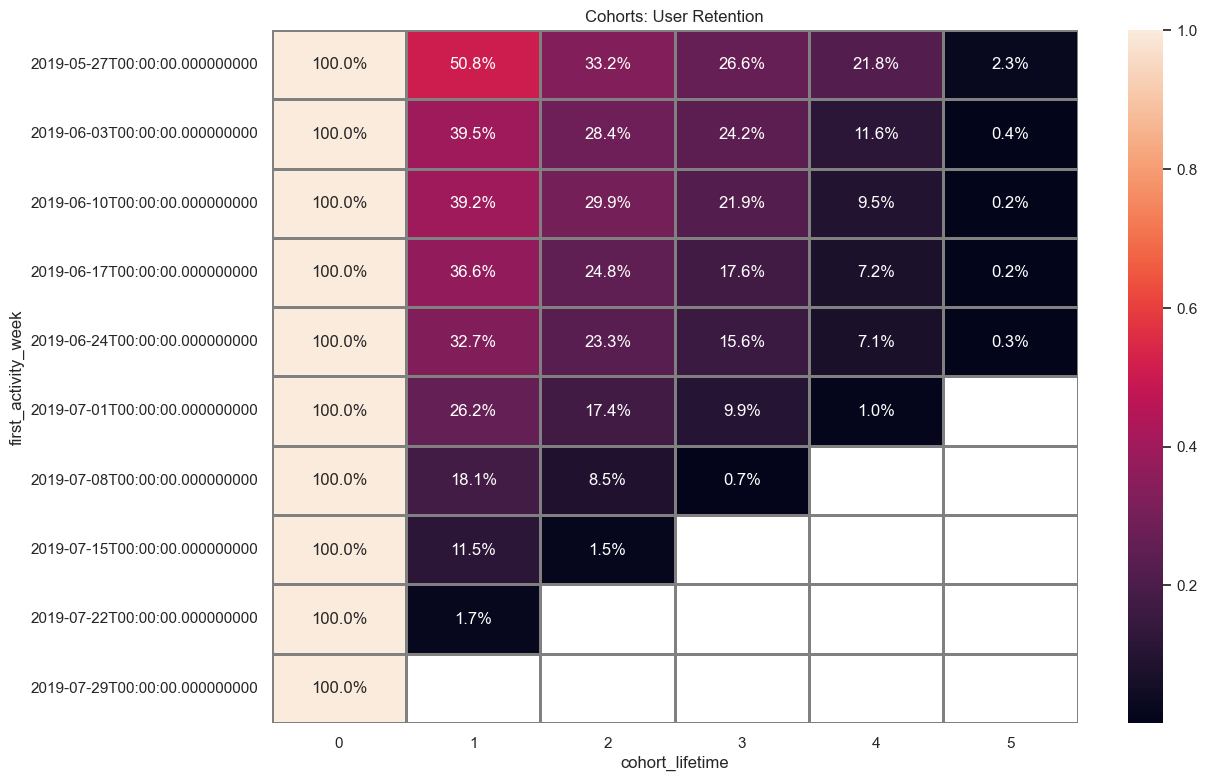

In [90]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray')

# TASK 9 - Расчёт Churn Rate в Python

In [91]:
cohorts = pd.read_csv(r'F:\Макс 2023\Аналитика данных\Как стать аналитиком данных [часть 4 из 6] (2021)\[Moresliv.com] 08_Спринт_Анализ бизнес-показателей\[Moresliv.com] 03_Когортный анализ\[Moresliv.com] churn_rate.csv')

In [92]:
cohorts.head()

,first_event_week,lifetime,users_count
0,2019-05-06,0,20
1,2019-05-06,1,8
2,2019-05-06,2,5
3,2019-05-06,3,7
4,2019-05-06,4,5


In [93]:
cohorts['churn_rate'] = cohorts.groupby('first_event_week')['users_count'].pct_change()

In [94]:
cohorts.head()

,first_event_week,lifetime,users_count,churn_rate
0,2019-05-06,0,20,NaN
1,2019-05-06,1,8,-0.600000
2,2019-05-06,2,5,-0.375000
3,2019-05-06,3,7,0.400000
4,2019-05-06,4,5,-0.285714


In [101]:
churn_pivot = cohorts.pivot_table(index='first_event_week', 
                                  columns='lifetime', 
                                  values='churn_rate', 
                                  aggfunc='sum')
churn_pivot

lifetime,0,1,2,3,4,5,6,7
first_event_week,,,,,,,,
2019-05-06,0.0,-0.600000,-0.375000,0.400000,-0.285714,0.200000,0.333333,-0.5
2019-05-13,0.0,-0.693333,0.217391,-0.178571,0.173913,-0.074074,0.240000,NaN
2019-05-20,0.0,-0.658824,-0.034483,0.535714,-0.302326,0.133333,NaN,NaN
2019-05-27,0.0,-0.426087,-0.333333,0.113636,-0.163265,NaN,NaN,NaN
2019-06-03,0.0,-0.425000,-0.010870,-0.098901,NaN,NaN,NaN,NaN
2019-06-10,0.0,-0.352564,-0.079208,NaN,NaN,NaN,NaN,NaN
2019-06-17,0.0,-0.326316,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-24,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Churn Rate'}, xlabel='lifetime', ylabel='first_event_week'>

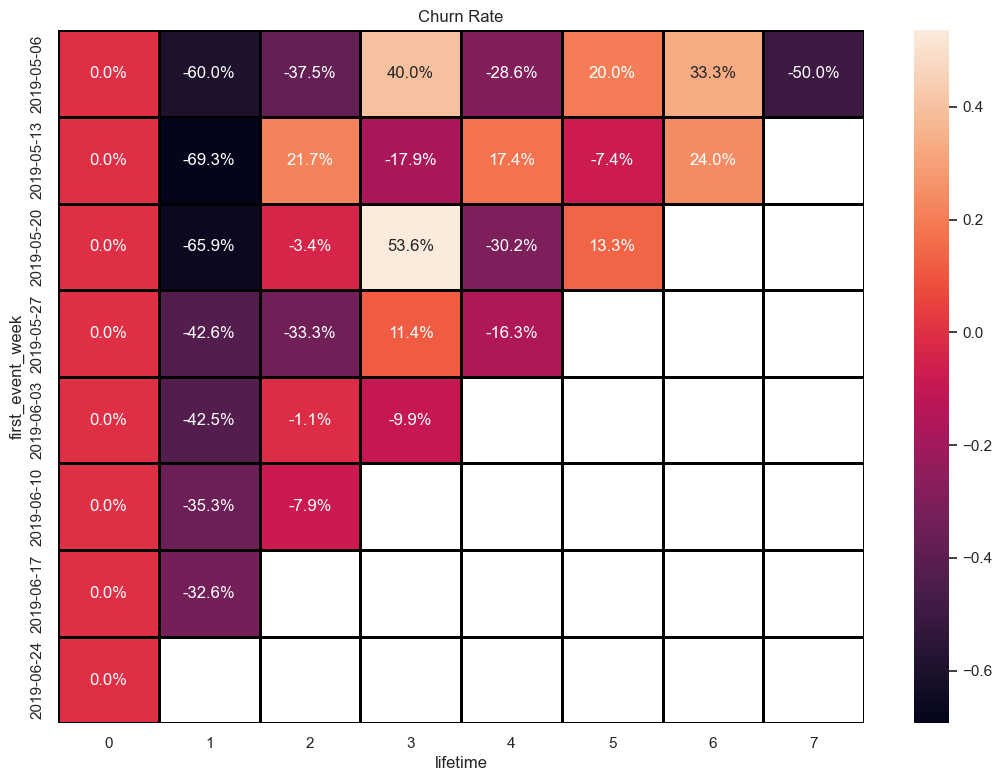

In [102]:
plt.figure(figsize=(13, 9))
plt.title('Churn Rate')
sns.heatmap(churn_pivot, fmt='.1%', annot=True, linewidths=1, linecolor='black')

# TASK 10 - Поведенческие когорты

In [103]:
events = pd.read_csv(r'F:\Макс 2023\Аналитика данных\Как стать аналитиком данных [часть 4 из 6] (2021)\[Moresliv.com] 08_Спринт_Анализ бизнес-показателей\[Moresliv.com] 03_Когортный анализ\[Moresliv.com] coffee_home.csv')

In [104]:
events.head()

,coffee_time,user_id,first_coffee_datetime,order_id,coffee_week,first_coffee_week,cohort_lifetime
0,2019-01-28 01:08:00,2d8ad2,2019-01-28 01:08:00,7845,2019-01-28,2019-01-28,0
1,2019-01-28 11:12:12,b994e6,2019-01-28 11:12:12,7846,2019-01-28,2019-01-28,0
2,2019-01-29 07:11:29,464d6c,2019-01-29 07:11:29,7847,2019-01-28,2019-01-28,0
3,2019-01-29 16:42:35,59b512,2019-01-29 16:42:35,7848,2019-01-28,2019-01-28,0
4,2019-01-30 01:15:24,d8dc9d,2019-01-30 01:15:24,7849,2019-01-28,2019-01-28,0


In [108]:
events['coffee_time'] = pd.to_datetime(events['coffee_time'])
events['first_coffee_datetime'] = pd.to_datetime(events['first_coffee_datetime'])
events['coffee_week'] = pd.to_datetime(events['coffee_week'])
events['first_coffee_week'] = pd.to_datetime(events['first_coffee_week'])

In [109]:
events['time_to_event'] = events['coffee_week'] - events['first_coffee_week']

In [110]:
events.head()

,coffee_time,user_id,first_coffee_datetime,order_id,coffee_week,first_coffee_week,cohort_lifetime,time_to_event
0,2019-01-28 01:08:00,2d8ad2,2019-01-28 01:08:00,7845,2019-01-28,2019-01-28,0,0 days
1,2019-01-28 11:12:12,b994e6,2019-01-28 11:12:12,7846,2019-01-28,2019-01-28,0,0 days
2,2019-01-29 07:11:29,464d6c,2019-01-29 07:11:29,7847,2019-01-28,2019-01-28,0,0 days
3,2019-01-29 16:42:35,59b512,2019-01-29 16:42:35,7848,2019-01-28,2019-01-28,0,0 days
4,2019-01-30 01:15:24,d8dc9d,2019-01-30 01:15:24,7849,2019-01-28,2019-01-28,0,0 days


In [111]:
filtered_events = events[events['time_to_event'] < '30 days']

In [114]:
filtered_events.head(10)

,coffee_time,user_id,first_coffee_datetime,order_id,coffee_week,first_coffee_week,cohort_lifetime,time_to_event
0,2019-01-28 01:08:00,2d8ad2,2019-01-28 01:08:00,7845,2019-01-28,2019-01-28,0,0 days
1,2019-01-28 11:12:12,b994e6,2019-01-28 11:12:12,7846,2019-01-28,2019-01-28,0,0 days
2,2019-01-29 07:11:29,464d6c,2019-01-29 07:11:29,7847,2019-01-28,2019-01-28,0,0 days
3,2019-01-29 16:42:35,59b512,2019-01-29 16:42:35,7848,2019-01-28,2019-01-28,0,0 days
4,2019-01-30 01:15:24,d8dc9d,2019-01-30 01:15:24,7849,2019-01-28,2019-01-28,0,0 days
5,2019-01-30 01:23:55,0e7888,2019-01-30 01:23:55,7850,2019-01-28,2019-01-28,0,0 days
6,2019-01-30 01:50:19,36e446,2019-01-30 01:50:19,7851,2019-01-28,2019-01-28,0,0 days
7,2019-01-30 01:56:32,6eba43,2019-01-30 01:56:32,7852,2019-01-28,2019-01-28,0,0 days
8,2019-01-30 04:20:26,2d8ad2,2019-01-28 01:08:00,7853,2019-01-28,2019-01-28,0,0 days
9,2019-01-30 05:22:58,ff6d8a,2019-01-30 05:22:58,7854,2019-01-28,2019-01-28,0,0 days


In [117]:
count_events_by_users = filtered_events.groupby('user_id').agg({'coffee_time': 'count'}).reset_index()
count_events_by_users['is_target_behavior'] = count_events_by_users['coffee_time'] > 4
count_events_by_users

,user_id,coffee_time,is_target_behavior
0,000cef,6,True
1,001ab5,4,False
2,002a14,9,True
3,002ae6,1,False
4,0034dc,5,True
...,...,...,...
9995,ffe7ea,7,True
9996,ffef65,4,False
9997,fff467,9,True
9998,fffb5c,1,False


In [126]:
user_ids_with_target_behavior = count_events_by_users[count_events_by_users['is_target_behavior']]['user_id'].unique()

In [127]:
user_ids_without_target_behavior = count_events_by_users[~count_events_by_users['is_target_behavior']]['user_id'].unique()

In [129]:
events.loc[events['user_id'].isin(user_ids_with_target_behavior), 'is_in_behavioral_cohort'] = 'yes'
events.loc[events['user_id'].isin(user_ids_without_target_behavior), 'is_in_behavioral_cohort'] = 'no'

In [130]:
events

,coffee_time,user_id,first_coffee_datetime,order_id,coffee_week,first_coffee_week,cohort_lifetime,time_to_event,is_in_behavioral_cohort
0,2019-01-28 01:08:00,2d8ad2,2019-01-28 01:08:00,7845,2019-01-28,2019-01-28,0,0 days,no
1,2019-01-28 11:12:12,b994e6,2019-01-28 11:12:12,7846,2019-01-28,2019-01-28,0,0 days,no
2,2019-01-29 07:11:29,464d6c,2019-01-29 07:11:29,7847,2019-01-28,2019-01-28,0,0 days,no
3,2019-01-29 16:42:35,59b512,2019-01-29 16:42:35,7848,2019-01-28,2019-01-28,0,0 days,no
4,2019-01-30 01:15:24,d8dc9d,2019-01-30 01:15:24,7849,2019-01-28,2019-01-28,0,0 days,no
...,...,...,...,...,...,...,...,...,...
45743,2019-05-25 23:59:36,c20dd3,2019-05-25 23:56:34,53588,2019-05-20,2019-05-20,0,0 days,yes
45744,2019-05-25 23:59:39,c20dd3,2019-05-25 23:56:34,53589,2019-05-20,2019-05-20,0,0 days,yes
45745,2019-05-25 23:59:46,6d195b,2019-05-25 22:57:21,53590,2019-05-20,2019-05-20,0,0 days,yes
45746,2019-05-25 23:59:47,048896,2019-05-25 23:53:57,53591,2019-05-20,2019-05-20,0,0 days,yes


In [131]:
events.groupby('is_in_behavioral_cohort')['user_id'].nunique()

is_in_behavioral_cohort
no     7332
yes    2668
Name: user_id, dtype: int64

## TASK 10_5

In [133]:
def printRetentionRate(df):
    cohorts = (
        df.groupby(['first_coffee_week', 'cohort_lifetime'], as_index=False)
        .agg({'user_id': 'nunique'})
        .sort_values(['first_coffee_week', 'cohort_lifetime'])
    )

    inital_users_count = cohorts[cohorts['cohort_lifetime'] == 0][
        ['first_coffee_week', 'user_id']
    ]
    inital_users_count = inital_users_count.rename(
        columns={'user_id': 'cohort_users'}
    )

    cohorts = cohorts.merge(inital_users_count, on='first_coffee_week')

    cohorts['retention'] = cohorts['user_id'] / cohorts['cohort_users']

    print(cohorts.groupby(['cohort_lifetime'])['retention'].mean())
    cohorts.groupby(['cohort_lifetime'])['retention'].mean().plot.bar()

cohort_lifetime
0     1.000000
1     0.311998
2     0.279513
3     0.260538
4     0.265083
5     0.306324
6     0.308610
7     0.272586
8     0.292664
9     0.295852
10    0.278823
11    0.258286
12    0.278289
13    0.266411
14    0.221111
15    0.238636
16    0.242424
Name: retention, dtype: float64


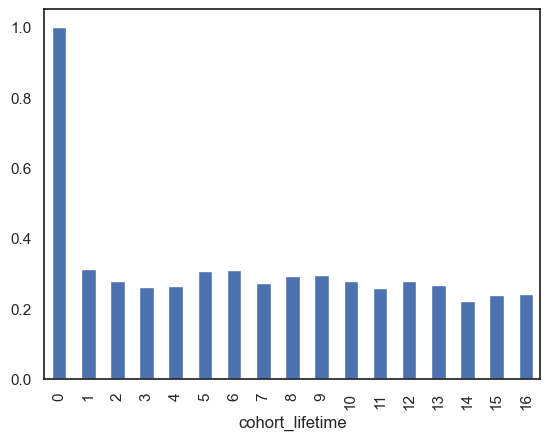

In [134]:
printRetentionRate(events[events['is_in_behavioral_cohort']=='no'])

cohort_lifetime
0     1.000000
1     0.744269
2     0.712896
3     0.730717
4     0.647735
5     0.386451
6     0.378853
7     0.370485
8     0.317874
9     0.352495
10    0.426302
11    0.327924
12    0.293032
13    0.260057
14    0.277778
15    0.375000
16    0.750000
Name: retention, dtype: float64


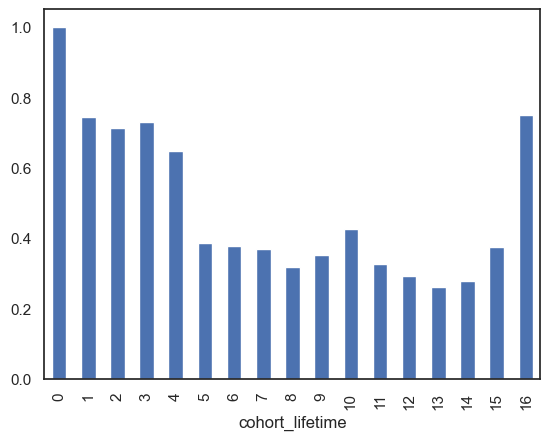

In [135]:
printRetentionRate(events[events['is_in_behavioral_cohort']=='yes'])